# Homework 7

## Readings: Lecture 08

## Problem 1

Show that, if $f\in C^2(\mathbb{R}^n)$ is strictly convex, then Newton's method initialized at some $x^{(0)}\in\mathbb{R}^n$ with backtracking produces a sequence $x^{(k)}$ with $f(x^{(k+1)})<f(x^{(k)})$ for all $k\geq 0$.

## Solution to Problem 1
We have: 
$$f(x^{(k+1)})=f(x^{(k)})+\nabla f(x^{(k)})^T(x^{(k+1)}-x^{(k)})+\frac{1}{2}(x^{(k+1)}-x^{(k)})^T\nabla^2f(\xi)(x^{(k+1)}-x^{(k)})^T$$
With $\xi$ between $x^{(k)}$ and $x^{(k+1)}$  
  
We mark the step size $\eta=\beta^n$ and $\nabla^2f(\xi)=\nabla^2f(x^{(k)})+\epsilon$.  
Since $f\in C^2(\mathbb{R}^n)$, when we let $n\rightarrow\infty$, $\eta\rightarrow0$ and thus $\Vert\epsilon\Vert\rightarrow 0$.  
  
We can write $x^{(k+1)}-x^{(k)}=\eta\nabla^2f(x^{(k)})^{-1}\nabla f(x^{(k)})$, then the above equation is:
$$f(x^{(k+1)})-f(x^{(k)})=-\eta\nabla f(x^{(k)})^T\nabla^2f(x^{(k)})^{-1}\nabla f(x^{(k)})+\frac{\eta^2}{2}\nabla f(x^{(k)})^T\nabla^2f(x^{(k)})^{-1}\nabla^2f(\xi)\nabla^2f(x^{(k)})^{-1}\nabla f(x^{(k)})$$
$$=-\eta\nabla f(x^{(k)})^T\nabla^2f(x^{(k)})^{-1}\nabla f(x^{(k)})+\frac{\eta^2}{2}\nabla f(x^{(k)})^T\nabla^2f(x^{(k)})^{-1}(\nabla^2f(x^{(k)})+\epsilon)\nabla^2f(x^{(k)})^{-1}\nabla f(x^{(k)})$$
$$=-\eta\nabla f(x^{(k)})^T\nabla^2f(x^{(k)})^{-1}\nabla f(x^{(k)})+\frac{\eta^2}{2}\nabla f(x^{(k)})^T\nabla^2f(x^{(k)})^{-1}\nabla f(x^{(k)})+\frac{\eta^2}{2}\nabla f(x^{(k)})^T\nabla^2f(x^{(k)})^{-1}\epsilon\nabla^2f(x^{(k)})^{-1}\nabla f(x^{(k)})$$
$$=(-\eta+\frac{\eta^2}{2})\nabla f(x^{(k)})^T\nabla^2f(x^{(k)})^{-1}\nabla f(x^{(k)})+\frac{\eta^2}{2}\nabla f(x^{(k)})^T\nabla^2f(x^{(k)})^{-1}\epsilon\nabla^2f(x^{(k)})^{-1}\nabla f(x^{(k)})$$
If we let $n$ big enough such that $$\nabla f(x^{(k)})^T\nabla^2f(x^{(k)})^{-1}\epsilon\nabla^2f(x^{(k)})^{-1}\nabla f(x^{(k)})<\nabla f(x^{(k)})^T\nabla^2f(x^{(k)})^{-1}\nabla f(x^{(k)})$$
Then we have the above equation:
$$<(-\eta+\eta^2)\nabla f(x^{(k)})^T\nabla^2f(x^{(k)})^{-1}\nabla f(x^{(k)})$$
$$<0$$

## Problem 2

For the toy logistic regression problem from class, consider the **regularized** logistic regression function

$$
f(\beta) = \sum_{i=1}^5 \log\left(1+\exp((-1)^{y_i}x_i^T\beta)\right) + \lambda\Vert\beta\Vert^2
$$

where $\lambda>0$. 

### Part A

The $f$ above is strictly convex no matter how the $x_i$'s and $y_i$'s are changed. Why is that the case?

### Part B

Modify the code from Lecture 07 in order to minimize $f$ using the "toy" dataset, and perform minimization using gradient descent with backtracking and Newton's method with backtracking. For $\lambda=0.1, 1, 10$, run 10 steps of each, plot the values $f(x^{(k)})-f(x^{(k+1)})$ and $\Vert \nabla f(x^{(k)})\Vert$ in separate semilogy y plots, and report the numerical solutions obtained in each case. 

## Solution to Problem 2
### Part A
If we mark $l(\beta;y,X)=\sum_{i=1}^5 \log\left(1+\exp((-1)^{y_i}x_i^T\beta)\right)$, then we can know from the lecture that:  
$\nabla^2l(\beta;y,X)$ is positive semidefinite, which means $l(\beta;y,X)$ is a convex function for $\beta$.
And we compute that:
$$\nabla^2(\lambda\Vert\beta\Vert^2)=diag(2\lambda,2\lambda,\cdots,2\lambda)$$
That indicates $\lambda\Vert\beta\Vert^2$ is a strictly convex function for $\beta$.  
So as the sum of two functions, $f(\beta)$ is strictly convex.
### Part B


In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

def f(b,y,X):
    return np.sum((y-Xb)**2)/2

def Df(b,y,X):
    return X.T @(X@b-y)

y = np.array([0,0,1,0,1])

X = np.array([[1, -2],
             [1, -1],
             [1, 0],
             [1, 1],
             [1, 2]])

In [2]:
def logit(x):
    return 1/(1+np.exp(-x))

def ell(b,y,X,lam):
    return np.sum(np.log(1+np.exp(((-1)**y)*(X@b))))+lam*(np.linalg.norm(b)**2)

def Dell(b,y,X,lam):
    return X.T @ (((-1)**y)*logit(((-1)**y)*(X@b)))+2*lam*b

def D2ell(b,y,X,lam):
    return (X.T * (logit(-X@b)*logit(X@b))) @ X+2*lam*np.identity(len(b))

In [3]:

def backtracking(x0, dx, f, df0, alpha=0.2, beta=0.8):
    '''
    Backtracking for general functions with illustrations
    :param x0: Previous point from backtracking, or initial guess
    :param dx: Incremental factor for updating x0
    :param f: Objective function
    :param df0: Gradient of f at x0
    :param alpha: Sloping factor of stopping criterion
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots and data
    :return: x1, the next iterate in backtracking
    '''

    # Note that the definition below requires that dx and df0 have the same shape
    delta = alpha * np.sum(dx * df0) # A general, but memory intensive inner product; df0.T @ dx in Python 3.5+
    
    t = 1 # Initialize t=beta^0
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}
    fx = f(x)
    
    while (not np.isfinite(fx)) or f0 + delta * t < fx:
        t = beta * t
        x = x0 + t * dx
        fx = f(x)

    return x

lambda= 0.1


Gradient Descent:
[-0.45743708  0.91238116]


Newton
[-0.45751207  0.91218962]


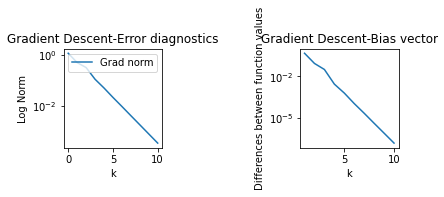

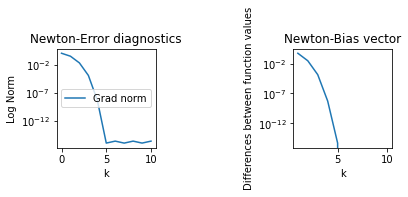

lambda= 1


Gradient Descent:
[-0.15974522  0.45973111]


Newton
[-0.15973204  0.45990824]


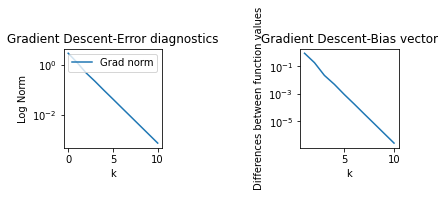

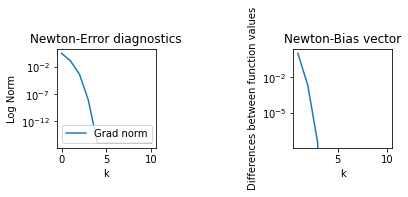

lambda= 10


Gradient Descent:
[-0.0235364   0.08888121]


Newton
[-0.02353492  0.08891231]


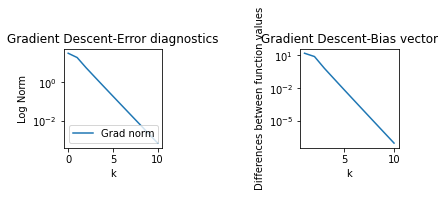

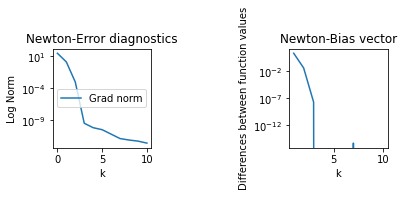

In [6]:
lambda_set=[0.1,1,10]

for lam in lambda_set:
    f = lambda b: ell(b,y,X,lam) # initialize the negative log likelihood as a function of just b
    b1 = rd.randn(2) # Initialize \beta_0
    b2=b1

    steps = 10

    grad_LR_gd = np.zeros((steps+1,1))
    grad_LR_gd[0] = np.linalg.norm(Dell(b1,y,X,lam))
    grad_LR_nt = np.zeros((steps+1,1))
    grad_LR_nt[0] = np.linalg.norm(Dell(b2,y,X,lam))

    f_val_gd = np.zeros((steps+1,1))
    f_val_gd[0] = f(b1)
    f_val_nt = np.zeros((steps+1,1))
    f_val_nt[0] = f(b2)

    for k in range(steps):
        v = Dell(b1,y,X,lam)
        b1 = backtracking(b1, -10*v, f, v)
        grad_LR_gd[k+1] = np.linalg.norm(Dell(b1,y,X,lam))
        f_val_gd[k+1] = f(b1)

    for k in range(steps):
        v = np.linalg.solve(D2ell(b2,y,X,lam),Dell(b2,y,X,lam))
        b2 = backtracking(b2, -v, f, Dell(b2,y,X,lam))
        grad_LR_nt[k+1] = np.linalg.norm(Dell(b2,y,X,lam))
        f_val_nt[k+1] = f(b2)

    print('lambda=',lam)
    print('\n')
    print('Gradient Descent:')
    print(b1)
    print('\n')
    print('Newton')
    print(b2)
    
    plt.subplot(231)
    plt.semilogy(range(steps+1), grad_LR_gd, label='Grad norm')
    plt.xlabel('k')
    plt.ylabel('Log Norm')
    plt.legend()
    plt.title('Gradient Descent-Error diagnostics')

    plt.subplot(233)
    plt.semilogy(np.array(range(steps))+1, f_val_gd[:steps]-f_val_gd[1:]) # Note that f is positive, so we can take a log
    plt.xlabel('k')
    plt.ylabel('Differences between function values')

    plt.title('Gradient Descent-Bias vector')
    plt.show()

    plt.subplot(234)
    plt.semilogy(range(steps+1), grad_LR_nt, label='Grad norm')
    plt.xlabel('k')
    plt.ylabel('Log Norm')
    plt.legend()
    plt.title('Newton-Error diagnostics')

    plt.subplot(236)
    plt.semilogy(np.array(range(steps))+1, f_val_nt[:steps]-f_val_nt[1:]) # Note that f is positive, so we can take a log
    plt.xlabel('k')
    plt.ylabel('Differences between function values')
    plt.title('Newton-Bias vector')
    plt.show()

## Problem 3

In this problem, you will fit logistic regression using the Wisconsin Breast Cancer dataset in scikit-learn. The BCW data consists of 569 examples in 30 dimension, and the target is a binary variable indicating whether a tumor is malignant or benign. 

1. Load the BCW data using scikit-learn.
2. Augment the data with a column of $1$'s to create a full design matrix $X$.
3. Set $y$ to be target from the BCW data.
4. Fit $\beta$ to this data using both gradient descent with backtracking and Newton's method with backtracking
    * Run both procedures until $\Vert \nabla f(x^{(k)})\Vert<10^{-3}$, report these two $k$'s, and provide a semilog plot for the norms of the gradients for both procedures
    * For both procedures, keep track of the differences $f(x^{(k)})-f(x^{(k+1)})$, and provide a semilog plot of these differences to assess convergence of function values
    * Use the Python module timeit to compute time required to run both procedures, and indicate which procedure has a shorter runtime



## Solution to Problem 3

In [9]:
### Load the BCW data using scikit-learn
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
BCW = load_breast_cancer()
print(BCW.data.shape)

(569, 30)


In [10]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
y=BCW.target
one = np.ones((569,1))
X=scale(BCW.data)
X = np.concatenate((one, X), axis=1)

D:\Anaconda\envs\learn\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Time of Gradient Descent: 6.70309030000044
Time of Newton: 0.3138123999997333
Steps of Gradient Descent: 5446
Steps of Newton: 10


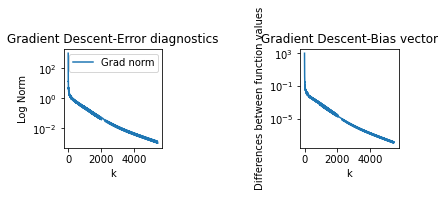

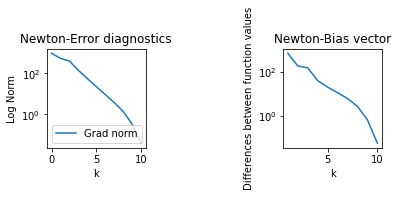

In [11]:
from timeit import Timer
 
max_steps = 10000
lam=0.01
stop_limit=1e-3

f = lambda b: ell(b,y,X,lam) # initialize the negative log likelihood as a function of just b
b1 = rd.randn(31) # Initialize \beta_0
b2=b1

grad_LR_gd = np.zeros((max_steps+1,1))
grad_LR_gd[0] = np.linalg.norm(Dell(b1,y,X,lam))
grad_LR_nt = np.zeros((max_steps+1,1))
grad_LR_nt[0] = np.linalg.norm(Dell(b2,y,X,lam))

f_val_gd = np.zeros((max_steps+1,1))
f_val_gd[0] = f(b1)
f_val_nt = np.zeros((max_steps+1,1))
f_val_nt[0] = f(b2)


def gd(b1):
    k1=0
    while(k1 < max_steps):
        v = Dell(b1,y,X,lam)
        b1 = backtracking(b1, -10*v, f, v)
        grad_LR_gd[k1+1] = np.linalg.norm(Dell(b1,y,X,lam))
        f_val_gd[k1+1] = f(b1)
        if(grad_LR_gd[k1+1] < stop_limit):
            break;
        k1=k1+1
    return k1

def nt(b2):
    k2=0
    while(k2 < max_steps):
        gra=Dell(b2,y,X,lam)
        v = np.linalg.solve(D2ell(b2,y,X,lam),gra)
        b2 = backtracking(b2, -v, f, gra)
        grad_LR_nt[k2+1] = np.linalg.norm(Dell(b2,y,X,lam))
        f_val_nt[k2+1] = f(b2)
        if(grad_LR_nt[k2+1] < stop_limit):
            break;
        k2=k2+1
    return k2


T1 = Timer("gd(b1)", "from __main__ import gd,b1")
T2 = Timer("nt(b2)", "from __main__ import nt,b2")

print('Time of Gradient Descent:',T1.timeit(1))
print('Time of Newton:',T2.timeit(1))

k1=gd(b1)
k2=nt(b2)

print('Steps of Gradient Descent:',k1)
print('Steps of Newton:',k2)

plt.subplot(231)
plt.semilogy(range(k1+1), grad_LR_gd[:(k1+1)], label='Grad norm')
plt.xlabel('k')
plt.ylabel('Log Norm')
plt.legend()
plt.title('Gradient Descent-Error diagnostics')

plt.subplot(233)
plt.semilogy(np.array(range(k1))+1, f_val_gd[:k1]-f_val_gd[1:(k1+1)]) # Note that f is positive, so we can take a log
plt.xlabel('k')
plt.ylabel('Differences between function values')

plt.title('Gradient Descent-Bias vector')
plt.show()

plt.subplot(234)
plt.semilogy(range(k2+1), grad_LR_nt[:(k2+1)], label='Grad norm')
plt.xlabel('k')
plt.ylabel('Log Norm')
plt.legend()
plt.title('Newton-Error diagnostics')

plt.subplot(236)
plt.semilogy(np.array(range(k2))+1, f_val_nt[:k2]-f_val_nt[1:(k2+1)]) # Note that f is positive, so we can take a log
plt.xlabel('k')
plt.ylabel('Differences between function values')
plt.title('Newton-Bias vector')
plt.show()

## Problem 4

This problem will also use the BCW data, but you will create a **receiver operating characteristic** (ROC) curve to evaluate the practical utility of logisitic regression. Use the design matrix and reponse vector from the previous problem.

1. Use the functions in numpy.random to split the data into 5 random subsets ($4$ subsets should have 114 examples, and $1$ subset should have 113 examples) to prepare for cross validation.
2. For each of the five subsets, perform Newton's method with backtracking to fit logistic regression using the data **outside** the subset (so, you will fit using 455 data points for the first 4 subsets, and 456 points for the last subset). Use the stopping criteria $\Vert \nabla f(x^{(k)})\Vert<10^{-6}$
3. This last step gives you five examples $\tilde{\beta}\in \mathbb{R}^{31}$ (one extra variable for the $\beta_0$ term). For each $\tilde{\beta}$, the probability of malignancy is $\text{logit}(x_i\tilde{\beta})$ where $x_i$ is the $i$th row of the design matrix. 
4. We can define a **detection** procedure for malignancy by declaring the $i$th example to be malignant if $\text{logit}(x_i\tilde{\beta})>\eta$ where $\eta\in[0,1]$. ROC curves allow us to assess the tradeoff between the true positive rate and false positive rate for all the different values of $\eta$.
5. Use *sklearn.metric.roc_curve* to create ROC curve data for this detection procedure each of the five $\tilde{\beta}$'s, simultaneously display all of these ROC curves in a plot (use a lower alpha value to increase contrast), and interpret the results. 

## Solution to Problem 4

In [12]:
from sklearn.metrics import roc_curve
from numpy.random import shuffle
order=np.arange(569)
shuffle(order)

test=[X[order[0:114],], X[order[114:228],], X[order[228:342],], X[order[342:456],], X[order[456:569],]]
train=[X[order[114:569],], X[order[np.append(np.arange(114), np.arange(228,569))],], \
       X[order[np.append(np.arange(228), np.arange(342,569))],],\
      X[order[np.append(np.arange(342), np.arange(456,569))],],\
      X[order[:456],]]

target_train=[y[order[114:569],], y[order[np.append(np.arange(114), np.arange(228,569))],], \
       y[order[np.append(np.arange(228), np.arange(342,569))],],\
      y[order[np.append(np.arange(342), np.arange(456,569))],],\
      y[order[:456],]]
target_test=[y[order[0:114],], y[order[114:228],], y[order[228:342],], y[order[342:456],], y[order[456:569],]]

#######
Training set 0
Newton Steps: 12
Predicting set 0
#######
Training set 1
Newton Steps: 12
Predicting set 1
#######
Training set 2
Newton Steps: 13
Predicting set 2
#######
Training set 3
Newton Steps: 12
Predicting set 3
#######
Training set 4
Newton Steps: 12
Predicting set 4
#######
Prediction Complete


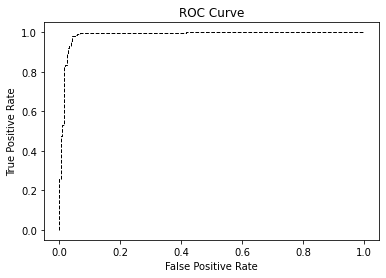

In [13]:
import matplotlib.pyplot as plt
max_steps = 10000
lam=0.01
stop_limit=1e-6

predict=[]

for index in range(5):
    print('#######')
    print('Training set', index)
    f = lambda b: ell(b,target_train[index],train[index],lam) # initialize the negative log likelihood as a function of just b
    b = rd.randn(31) # Initialize \beta_0

    def nt_4(b):
        k2=0
        while(k2 < max_steps):
            gra=Dell(b,target_train[index],train[index],lam)
            v = np.linalg.solve(D2ell(b,target_train[index],train[index],lam),gra)
            b = backtracking(b, -v, f, gra)
            if(np.linalg.norm(gra) < stop_limit):
                break;
            k2=k2+1
        return k2, b

    k, b=nt_4(b)
    print('Newton Steps:', k)
    print('Predicting set', index)
    one_predict=logit(test[index]@b)
    predict.extend(one_predict)
print('#######')
predict=np.array(predict)
print('Prediction Complete')

#print(predict.shape)

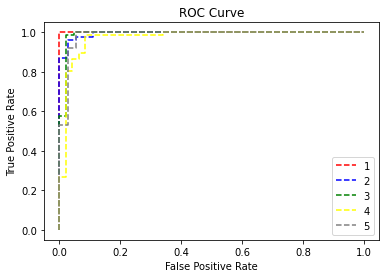

In [23]:
fpr1, tpr1, thersholds1 = roc_curve((y[order])[0:114], predict[0:114], pos_label=1)
fpr2, tpr2, thersholds2 = roc_curve((y[order])[114:228], predict[114:228], pos_label=1)
fpr3, tpr3, thersholds3 = roc_curve((y[order])[228:342], predict[228:342], pos_label=1)
fpr4, tpr4, thersholds4 = roc_curve((y[order])[342:456], predict[342:456], pos_label=1)
fpr5, tpr5, thersholds5 = roc_curve((y[order])[456:569], predict[456:569], pos_label=1)

plt.plot(fpr1, tpr1, 'k--', label=1, color='red')
plt.plot(fpr2, tpr2, 'k--', label=2, color='blue')
plt.plot(fpr3, tpr3, 'k--', label=3, color='green')
plt.plot(fpr4, tpr4, 'k--', label=4, color='yellow')
plt.plot(fpr5, tpr5, 'k--', label=5, color='gray')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### ROC Curve
We first have some definitions:  
  
TP: The counts of true predictions with results of positive labels.  
FP: The counts of false predictions with results of positive labels.  
TN: The counts of true predictions with results of negative labels.  
FN: The counts of false predictions with results of negative labels.  
  
FPR: $FPR=\frac{FP}{FP+TN}$  
TPR: $TPR=\frac{TP}{TP+FN}$  
  
The ROC Curve gives the curve plot of different points of TPR-FPR. (In this case, different $\eta$s are selected.)  
  
We cannot expect TPR to be extremely large and FPR to be extremely small at the same time. (They are somehow restricted by each other.)  
But we can have a basic judgement from the ROC curve.  
  
If the 'top-left point' of the curve is closer to the top-left corner and the area enclosed by the curve and the borders is larger, we tend to think the model has a better performance.  

### K-fold Cross Validation
Generally, we need to train the model on some dataset and make predictions on another dataset.  

In this problem, we can first randomly select $\frac{1}{5}$ of the whole dataset as the testing dataset and the remaining data as the training dataset. But that may lead to accidental performance.  

So a better way is to randomly split the dataset into 5 parts of the same amount data and each time select one as the testing dataset and the remaining data as the training dataset. 

Back to the problem, we can learn from the ROC Curves of logistic regression that in this situation the model performed quite well. The five curves seem to be similar.